# Lektion 3a
## **Växelströmeffekt** 

#### Effekt: produkt av strömmen och spänningen genom element

#### Enligt Joules lag, den **momentana** effektutvecklingen $p$ i belastningen är 

\begin{align}
p(t) = u(t)\cdot i(t)
\end{align}

#### Varierar u och i med tiden kommer också p att variera med tiden.

#### I praktiken är man vanligen ej intresserad av effektens **momentanvärde** utan i stället av effektens **tidsmedelvärde**.
#### Med växelströmseffekt menas medelvärdet av momentana effekten under en period $T$. 

\begin{align}
P_{avg} = \frac{1}{T}\int_0^T p(t) dt
\end{align}

#### Två termer:

- #### I en rent resistiv krets har vi direkt energiutbyte mellan strömkälla och belastning. Det kan vi kalla för förbrukade effekten i kretsen - **aktiv effekt $P$**
- #### I en rent reaktiv krets pendlar energi fram och tillbaka mellan strömkälla och belastningens magnetiska/elektriska fält. Den delen kallar vi för **reaktiv effekt $Q$**.

\begin{align}
P = U \cdot I \cos{(\phi)}\\
Q = U \cdot I \sin⁡{(\phi)}
\end{align}

- #### I en blandad krets har vi s.k. **skenbar effekt, S**, med belopp

\begin{align}
S = \sqrt{P^2 + Q^2}
\end{align}

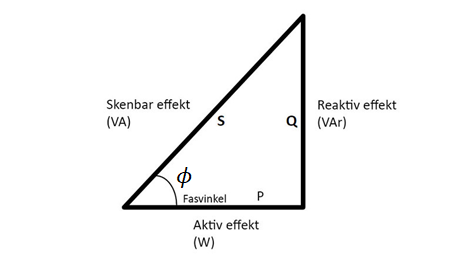

- #### Med komplexa, $j\omega$-metoden: 

\begin{align}
 \bar{S} = P + jQ = S (\cos{\phi} + j\sin{\phi}) = \bar{U}\cdot\bar{I}^* 
\end{align}

---

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import trapezoid
import cmath as cm

## Skapar sinusformade signaler för spänning och ström

In [18]:
V = 5 # spänningstoppvärde
I = 3 # strömmenstoppvärde
f = 1000 # signalfrekvens 1kHz
phi1 = 0 # fas för signal 1
phi2 = -np.pi/4 # fas for signal 2
N = 500 # antal punkter 
T = 1/f # periodtid
tMax = 2*T 
t = np.linspace(0,tMax, N) # tids axel
w = (2*np.pi)*f # vinkelfrekvens

### Räknar momentanteffekt

In [19]:
v = V*np.sin(w*t + phi1)
i = I*np.sin(w*t + phi2)
p = v*i

### Ritar momentanteffekt tillsammans med strömmen och spänningen

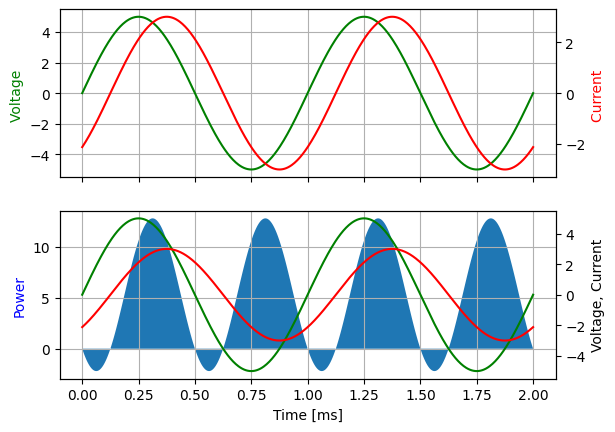

In [20]:
fig1, axs = plt.subplots(2,1,sharex=True)
x = t*1e3
ax0_right = axs[0].twinx()
# Spänning
axs[0].plot(x,v,'g-')
axs[0].set_ylabel('Voltage ', color='g')
# Ström
ax0_right.plot(x,i,'r-')
ax0_right.set_ylabel('Current ', color='r')
axs[0].grid(True)

# Power (effekt)
ax1_right = axs[1].twinx()
#axs[2].plot(x, p, 'g-')
# rita skuggade effect
axs[1].fill_between(x, p)
ax1_right.plot(x, v, 'g-', x, i, 'r-')
axs[1].set_xlabel('Time [ms]')
ax1_right.set_ylabel('Voltage, Current')
axs[1].set_ylabel('Power', color='b')
axs[1].grid(True)

## Uppgift 3.1

#### Medeleffekt

Räkna och rita på samma grafen medeleffekt för givna strömmen och spänningen

5.3033008588991075
5.303300858899107


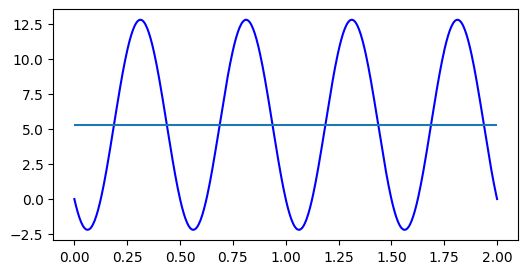

In [21]:
# momentanteffekt
fig1, ax1 = plt.subplots(figsize=(6,3))
x = t*1e3
ax1.plot(x, p,'b')
# fortsätt 

P = (1/tMax) * trapezoid(p,t)

print(P)

#eller

Pt = (V*I/2)*np.cos(phi2)

print(Pt)

ax1.hlines(P,0,2)

---

## Uppgift 3.2

### Två parallellkopplade belastningar är anslutna till klämmorna på en växelströmsgenerator, som ger en ren sinusström med frekvens 250 Hz. Den ena av dessa ledningar innehåller en spole med induktansen 0,20 H och resistansen 100 Ω. Den andra ledningen innehåller en resistans om 100 Ω och en kapacitans om 20 µF, kopplade i serie. Beräkna effektförbrukningen i respektive last då generatorströmmen är 1,0 A.

---

In [27]:
f = 250
w = 2*np.pi*f
C = 20 * 10**-6
L = 0.2
R = 100
I = 1

ZL = complex(R, w*L)
ZC = complex(R, -1/(w*C))
Zt = 1/((1/ZL) + (1/ZC))

U = Zt*I

IC = U/ZC
IL = U/ZL

SC = np.conjugate(IC)*U
SL = np.conjugate(IL)*U

PC = SC.real
PL = SL.real

print(f'Förbrukad effekt i den kapacitiva lasten {PC.round(1)} W \n Förbrukad effekt i den induktiva lasten {PL.round(2)} W')



Förbrukad effekt i den kapacitiva lasten 90.8 W 
 Förbrukad effekt i den induktiva lasten 9.2 W
